## Análisis Exploratorio de Datos

In [34]:
from netCDF4 import Dataset, num2date
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as crs
import pprint
import pandas as pd 
import os
from datetime import datetime
import seaborn as sns
import dataframe_image as dfi
from geopy.distance import geodesic
from scipy.spatial.distance import cdist, pdist
from scipy import stats

#### Lectura de los datos limpios

In [35]:
ds = pd.read_csv("datos_limpios.csv") 
ds

,date,city_hmo,city_nog,city_obr,HQprcp_hmo,HQprcp_nog,HQprcp_obr,prcp_hmo,prcp_nog,prcp_obr
0,2021-03-01,Hermosillo,Heroica Nogales,Ciudad Obregón,0.000,0.000,0.000,0.0,0.0,0.0
1,2021-03-02,Hermosillo,Heroica Nogales,Ciudad Obregón,0.000,0.000,0.000,0.0,0.0,0.0
2,2021-03-03,Hermosillo,Heroica Nogales,Ciudad Obregón,0.015,0.000,0.000,0.0,0.0,0.0
3,2021-03-04,Hermosillo,Heroica Nogales,Ciudad Obregón,0.000,0.000,0.000,0.0,0.0,0.0
4,2021-03-05,Hermosillo,Heroica Nogales,Ciudad Obregón,0.000,0.000,0.000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
148,2021-07-27,Hermosillo,Heroica Nogales,Ciudad Obregón,0.010,0.000,0.225,0.0,1.8,7.0
149,2021-07-28,Hermosillo,Heroica Nogales,Ciudad Obregón,0.010,0.000,0.080,0.0,3.1,0.3
150,2021-07-29,Hermosillo,Heroica Nogales,Ciudad Obregón,1.985,0.230,1.900,0.0,29.1,2.8
151,2021-07-30,Hermosillo,Heroica Nogales,Ciudad Obregón,2.760,0.925,11.865,0.0,8.4,4.6


In [36]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        153 non-null    object 
 1   city_hmo    153 non-null    object 
 2   city_nog    153 non-null    object 
 3   city_obr    153 non-null    object 
 4   HQprcp_hmo  153 non-null    float64
 5   HQprcp_nog  153 non-null    float64
 6   HQprcp_obr  153 non-null    float64
 7   prcp_hmo    153 non-null    float64
 8   prcp_nog    153 non-null    float64
 9   prcp_obr    153 non-null    float64
dtypes: float64(6), object(4)
memory usage: 12.1+ KB


In [37]:
ds.isnull().sum()

date          0
city_hmo      0
city_nog      0
city_obr      0
HQprcp_hmo    0
HQprcp_nog    0
HQprcp_obr    0
prcp_hmo      0
prcp_nog      0
prcp_obr      0
dtype: int64

In [38]:
ds.describe()

,HQprcp_hmo,HQprcp_nog,HQprcp_obr,prcp_hmo,prcp_nog,prcp_obr
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.00000
mean,0.197386,0.409248,0.488824,0.182353,4.281046,1.97451
std,0.748419,1.777923,1.656170,1.667259,11.955431,7.18014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.000000,0.035000,0.050000,0.000000,0.300000,0.00000
max,5.639999,19.584999,11.865000,19.400000,83.800000,41.10000


#### Podemos observar varias cosas, En Nogales es mayor el pronóstico de lluvia en comparación con las otras ciudades. Podemos ver que tiene un pronóstico de lluvia de 4mm y una desviación de 11, un poco alta. También el valor maximo fue dado para Nogales por PROMETEUS. En general, PROMETEUS da un pronóstico mas elevado en precipitación.


In [39]:
ds

,date,city_hmo,city_nog,city_obr,HQprcp_hmo,HQprcp_nog,HQprcp_obr,prcp_hmo,prcp_nog,prcp_obr
0,2021-03-01,Hermosillo,Heroica Nogales,Ciudad Obregón,0.000,0.000,0.000,0.0,0.0,0.0
1,2021-03-02,Hermosillo,Heroica Nogales,Ciudad Obregón,0.000,0.000,0.000,0.0,0.0,0.0
2,2021-03-03,Hermosillo,Heroica Nogales,Ciudad Obregón,0.015,0.000,0.000,0.0,0.0,0.0
3,2021-03-04,Hermosillo,Heroica Nogales,Ciudad Obregón,0.000,0.000,0.000,0.0,0.0,0.0
4,2021-03-05,Hermosillo,Heroica Nogales,Ciudad Obregón,0.000,0.000,0.000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
148,2021-07-27,Hermosillo,Heroica Nogales,Ciudad Obregón,0.010,0.000,0.225,0.0,1.8,7.0
149,2021-07-28,Hermosillo,Heroica Nogales,Ciudad Obregón,0.010,0.000,0.080,0.0,3.1,0.3
150,2021-07-29,Hermosillo,Heroica Nogales,Ciudad Obregón,1.985,0.230,1.900,0.0,29.1,2.8
151,2021-07-30,Hermosillo,Heroica Nogales,Ciudad Obregón,2.760,0.925,11.865,0.0,8.4,4.6


Text(0, 0.5, 'Días con lluvia')

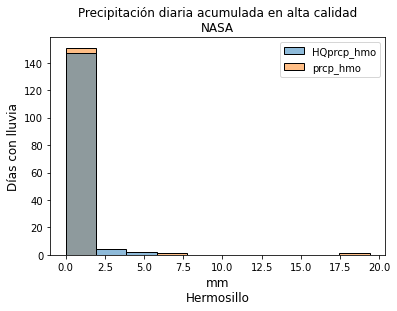

In [40]:
#Histograma de "HQprcp"

sns.histplot(data=ds[["HQprcp_hmo","prcp_hmo"]], bins=10)
plt.title("Precipitación diaria acumulada en alta calidad\nNASA", fontsize=12)
plt.xlabel("mm\nHermosillo", fontsize=12)
plt.ylabel("Días con lluvia", fontsize=12)

Text(0, 0.5, 'Días con lluvia')

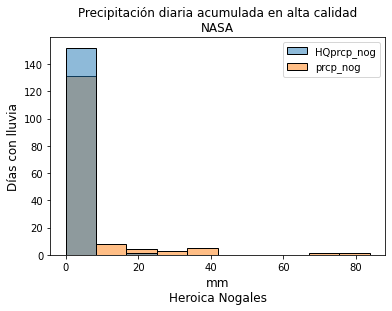

In [41]:
sns.histplot(data=ds[["HQprcp_nog","prcp_nog"]], bins=10)
plt.title("Precipitación diaria acumulada en alta calidad\nNASA", fontsize=12)
plt.xlabel("mm\nHeroica Nogales", fontsize=12)
plt.ylabel("Días con lluvia", fontsize=12)

Text(0, 0.5, 'Días con lluvia')

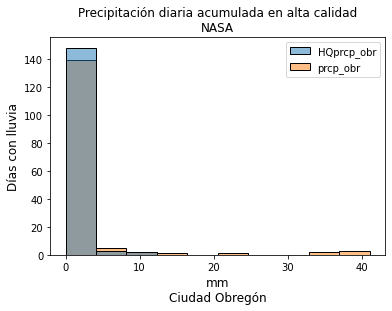

In [42]:
sns.histplot(data=ds[["HQprcp_obr","prcp_obr"]], bins=10)
plt.title("Precipitación diaria acumulada en alta calidad\nNASA", fontsize=12)
plt.xlabel("mm\nCiudad Obregón", fontsize=12)
plt.ylabel("Días con lluvia", fontsize=12)

#### Busqueda de correlación de los datos

<AxesSubplot:>

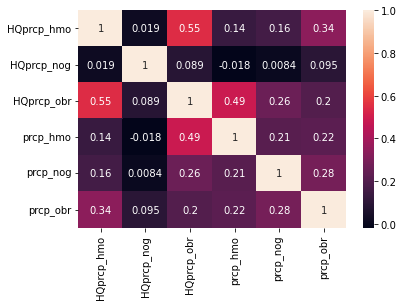

In [44]:
sns.heatmap(ds.corr(), annot=True)

#### Curiosamente podemos observar que existe una correlación entre Hermosillo y Ciudad Obregón. 